In [1]:
#-*- coding: utf-8 -*-

In [81]:
# bibliothèques

from sklearn.neighbors import DistanceMetric 
import statistics
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk import StanfordTagger 
from nltk import word_tokenize  
import seaborn as sns
import pandas as pd
from time import perf_counter as pf 
import nltk
import string 
import glob
from nltk.tag import StanfordPOSTagger
from textblob import TextBlob
import numpy as np
import random
from sklearn.model_selection import train_test_split
import re

In [ ]:
#, "euclidean", "canberra","braycurtis","hamming","dice", "matching", "kulsinski", "rogerstanimoto", "russellrao", "sokalmichener", "sokalsneath", "manhattan", "chebyshev"

In [85]:
# fonctions

def lire_fichier(chemin):
    """ouverture et lecture du document."""
    fichier = open(chemin, encoding='utf-8') 
    chaine = fichier.read()
    fichier.close()
    return chaine

def calcul_distance():
    """calcul de distance"""
    for nom_distance in ["braycurtis", "canberra", "jaccard", "hamming", "kulsinski"]:
        distance = DistanceMetric.get_metric(nom_distance)
        V = CountVectorizer(encoding='utf-8',lowercase=True, binary=True, ngram_range=(1,2))
        sections = ([section1, section2, section3, section4, section5, section6, section7, section8, section9, section10, section11, section12])
        X = V.fit_transform(sections).toarray()
        c = 1
        print(nom_distance)
        print()
        print(distance.pairwise(X))
        distance_elem1VS2 = distance.pairwise(X)[0][1]
        print(X[0][1])
        print()
        print(distance_elem1VS2)
        
def etiquetter_texte(t):
    """mettre des étiquettes sur les tokens"""
    jar = 'stanford-tagger-4.2.0/stanford-postagger-full-2020-11-17/stanford-postagger.jar' #java
    modele = 'stanford-tagger-4.2.0/stanford-postagger-full-2020-11-17/models/french-ud.tagger'  # le modele qui va permettre de taguer 
    blob = TextBlob(t) # API pour nlp
    etiquetter = StanfordPOSTagger(modele, jar, encoding='utf-8')
    texte_etiquette = pos_tagger.tag(blob.split())
    print(texte_etiquette) 
    
def heatmap(similarite, cmap='Blues'):
  df = pd.DataFrame(similarite)
  df.columns = labels
  df.index = labels
  fig, ax = plt.subplots(figsize=(7,7))
  sns.heatmap(df, linewidths=1, linecolor='black', cmap=cmap)

In [82]:
article1 = lire_fichier('../data/taln-archives-master/RECITAL/RECITAL-1999/actes/recital-1999-long-008.txt')
print(article1)

Extraction d’informations pour la veille technologique

Extraction d’informations pour la veille technologique
avec le système VIGITEXT
GOUJON Bénédicte
Équipe LaLIC du CAMS (UMR 17)

-

Bureau Van Dijk Ingénieurs Conseils

96 bd Raspail, 75006 Paris

-

57 bd de Montmorency, 75016 Paris

goujon@msh-paris.fr

Cet article présente la démarche suivie pour mettre en place un logiciel d’aide à la veille technologique. Pour
l’analyse de documents très techniques, les veilleurs utilisent des outils d’infométrie, qui sont pertinents sur les
données structurées, mais qui ne sont pas adaptés pour l’exploitation des informations textuelles. Nous avons
donc réalisé un logiciel d’extraction d’informations, nommé VIGITEXT. Notre approche, basée sur la définition
de notions indépendantes du domaine comme l’/amélioration/, l’/augmentation/ ou l’/utilisation/, permet
d’extraire des informations textuelles à partir d’abrégés descriptifs de brevets rédigés en anglais sans utiliser de
lexique technique o

In [16]:
# à la main 

section1 = """Cet article présente la démarche suivie pour réaliser un logiciel d’aide à la veille technologique.
L’observation des particularités de la veille, de ses outils, et du comportement des veilleurs nous a amené à
exploiter des notions indépendantes du sujet, comme l’/amélioration/, l’/augmentation/, l’/utilisation/. Le
prototype opérationnel VIGITEXT repère dans les données, en utilisant la méthode d’exploration contextuelle,
des extraits textuels exprimant ces notions."""

section2 = """Dans une démarche de veille technologique, il est nécessaire d’exploiter un maximum de sources
d’informations, afin de ne pas passer à côté d’informations capitales. La typologie de l’information présentée par
François Jakobiak [Jakobiak 95], qui propose une partition en classes, formes, types et supports, montre bien la
diversité des informations qui peuvent être exploitées pour la veille. Cependant, selon les spécialistes de la veille
technologique, comme Daniel Rouach [Rouach 96], les documents les plus importants dans une démarche de
veille technologique sont les brevets, rédigés en anglais, obtenus principalement sous forme d’abrégé descriptif
(ou référence) par l’interrogation de banques de données spécialisées. Le logiciel que nous réalisons doit être
adapté à ces sources d’information."""

section3 = """Par ailleurs, il est nécessaire d’utiliser plusieurs outils d’analyse de données, pour exploiter au mieux les
informations disponibles. Nous avons donc analysé les principaux outils adaptés à la veille, soit les outils
infométriques, et nous avons cherché à définir une nouvelle méthode d’analyse des données textuelles offrant un
résultat complémentaire pertinent pour le veilleur."""

section4 = """Les abrégés descriptifs de brevets contiennent des informations structurées, dans des champs “ auteur ”,
“ date ”, “ mots-clés ”, et des informations textuelles non structurées dans les champs “ titre ” et “ résumé ”. Les
outils infométriques utilisés pour la veille s’appliquent surtout sur les données structurées.
Recital’99
1GOUJON Bénédicte
Comme le décrit Françoise Rousseau-Hans [Rousseau-Hans 98], l’utilisation d’outils infométriques dans une
démarche de veille technologique permet une approche globale de l’information contenue dans un corpus. Ces
outils découpent d’abord les données en unités (mots, dates ou chaînes de caractères), puis appliquent des calculs
mathématiques afin d’obtenir sous forme de graphiques ou de cartes une représentation des unités en fonction de
relations ou proximités calculées. Par exemple, les outils Dataview, développé au CRRM [Dataview], ou
Tétralogie, développé à l’IRIT [Tétralogie], sont adaptés pour l’analyse des parties structurées des abrégés
descriptifs de brevets."""

section5 = """Cependant ces outils ne sont pas vraiment adaptés pour l’analyse du texte libre. En effet, la plupart des outils
infométriques attribuent de l’importance aux unités fréquentes. Or, le veilleur doit pouvoir identifier des indices
de veille, qui sont des informations rares mais justement très importantes. Par ailleurs, certains outils se basent
sur des terminologies prédéfinies. Or les informations étonnantes ou nouvelles s’expriment rarement avec des
termes ou à partir de concepts connus à l’avance. Donc, pour offrir un accès pertinent au contenu textuel des
abrégés descriptifs de brevet, nous avons choisi de mettre en place un outil d’extraction d’informations."""


section6 = """Les outils d’extraction terminologique ou d’acquisition de connaissances sont les principaux outils qui
permettent l’extraction d’informations. Par exemple, Coatis [Garcia 98] est un outil d’aide à l’élaboration d’une
terminologie de l’action liée à un domaine, qui utilise la stratégie de l’exploration contextuelle. Papins [Pugeault
95] est un outil d’extraction de connaissances à partir de textes, basé sur des descriptions de la sémantique
lexicale. Reader [Delisle 96] est un outil de création semi-automatique de lexique pour l’acquisition de
connaissances lexicales et conceptuelles. Ces trois outils, qui permettent l’extraction de connaissances à partir de
textes plutôt techniques, visent cependant à être utilisés par des terminologues ou ingénieurs de la connaissance.
Or notre objectif est de réaliser un outil qui soit utilisable directement par un veilleur."""

section7 = """Nous avons choisi les spécificités suivantes pour caractériser notre logiciel d’extraction d’informations : pas
d’utilisation de lexiques techniques prédéfinis, pas de calcul de fréquence des termes pour évaluer l’intérêt des
résultats obtenus, et résultats exploitables par des veilleurs."""

section8 = """Par ailleurs, nous avons observé une démarche de veille, qui a utilisé entre autre un corpus d’environ 2000
abrégés descriptifs de brevets en anglais sur le domaine des plantes transgéniques. Ces sources d’informations
textuelles ont été difficiles à exploiter. Le problème que l’on cherche à résoudre est de faciliter l’accès aux
informations pertinentes pour un veilleur dans une telle base documentaire."""

section9 = """Pour obtenir les résultats suivants, nous avons étudié un premier corpus de 30 documents de type abrégé
descriptif de brevets en anglais sur le thème des plantes transgéniques [Goujon 99]."""

section10 = """En observant quelques résumés de brevets, nous avons identifié des notions qui ne sont pas liées au domaine,
comme le /changement/, l’/utilisation/, l’/amélioration/, et qui reviennent fréquemment dans les textes. Cela est
en fait logique, car la description d’une innovation doit mettre en valeur ce qui est nouveau ou amélioré ou
différent."""

section11 = """Ces notions présentent donc plusieurs intérêts dans une démarche de veille : elles sont fréquentes dans ce
type de source d’information (parmi de nombreux termes techniques), elles apportent une information
intéressante sur ce qui est décrit dans chaque document, et elles sont utilisables quel que soit le sujet traité."""

section12 = """manipulons actuellement onze notions, organisées en deux ensembles : d’une part un ensemble
cohérent de notions exprimant un /changement/ (avec la notion générale /changement/, et quatre sous-notions
/amélioration/, /détérioration/, /augmentation/ et /diminution/), d’autre part un ensemble de notions diverses
introduisant un résultat (/production/, /résistance/, /utilisation/, /contrôle/, /identification/, /effet causé/). Ces
notions sont associées à des ensembles d’indicateurs linguistiques en anglais (transform, increase, application,
resistance, ...) qui, associés à des indices (prépositions, ...) vont permettre d’identifier les occurrences de ces
notions dans les textes."""

In [17]:
calcul_distance()

braycurtis

[[0.         0.84931507 0.85074627 0.85758514 0.90780142 0.8869258
  0.88505747 0.88940092 0.9030303  0.85365854 0.89583333 0.8677686 ]
 [0.84931507 0.         0.84115523 0.81954887 0.87709497 0.88300836
  0.912      0.80887372 0.87551867 0.86476868 0.87313433 0.90566038]
 [0.85074627 0.84115523 0.         0.85064935 0.80524345 0.86567164
  0.87421384 0.82178218 0.88       0.87368421 0.89830508 0.92070485]
 [0.85758514 0.81954887 0.85064935 0.         0.83547558 0.8974359
  0.9430605  0.82716049 0.90441176 0.88461538 0.89297659 0.91977077]
 [0.90780142 0.87709497 0.80524345 0.83547558 0.         0.85673352
  0.86666667 0.81625442 0.9047619  0.85239852 0.91472868 0.90909091]
 [0.8869258  0.88300836 0.86567164 0.8974359  0.85673352 0.
  0.90041494 0.8943662  0.94827586 0.91176471 0.92277992 0.92880259]
 [0.88505747 0.912      0.87421384 0.9430605  0.86666667 0.90041494
  0.         0.90857143 0.8699187  0.88957055 0.94666667 0.95      ]
 [0.88940092 0.80887372 0.82178218 0.82

/home/didier/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_distance_metric.py:10: FutureWarning: sklearn.neighbors.DistanceMetric has been moved to sklearn.metrics.DistanceMetric in 1.0. This import path will be removed in 1.3
  warnings.warn(


In [18]:
V = CountVectorizer(encoding='utf-8',lowercase=True, binary=True)
sections = ([section1, section2, section3, section4, section5, section6, section7, section8, section9, section10, section11, section12])
X = V.fit_transform(sections).toarray()
labels = [e[:30] for e in sections] # pour les 12 sections 

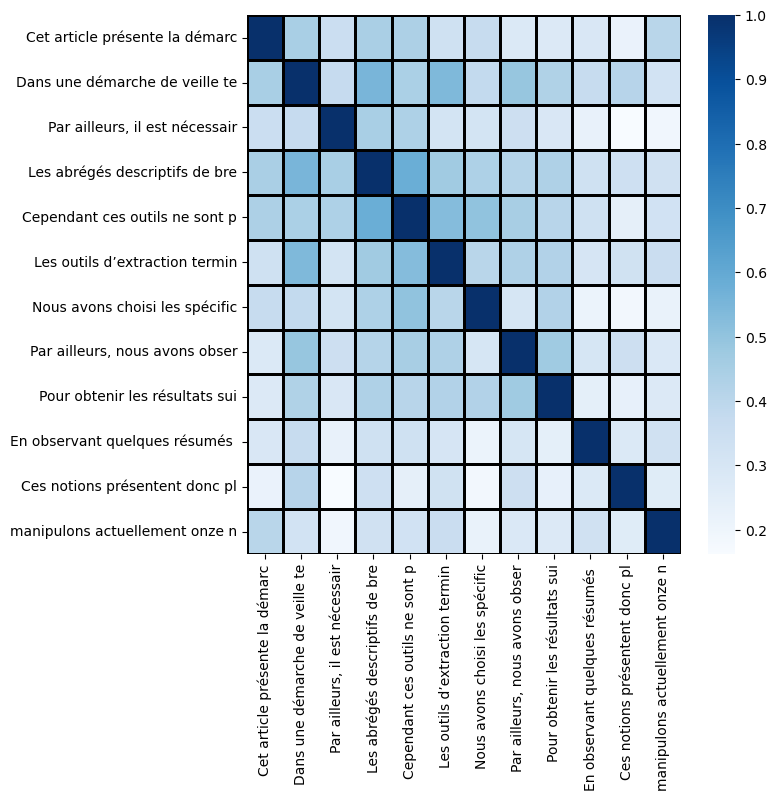

In [19]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(sections)
tab_vecteurs = X.toarray()
heatmap(cosine_similarity(tab_vecteurs))

In [90]:
# avant de vouloir faire ressortir les caractéristiques de chaque section 
# étiquetter chaque section pour ensuite les comparer d'un point de vue syntaxique
etiquetter_texte(section6)

[('Les', 'DET'), ('outils', 'NOUN'), ('d’extraction', 'NOUN'), ('terminologique', 'ADJ'), ('ou', 'CCONJ'), ('d’acquisition', 'NOUN'), ('de', 'ADP'), ('connaissances', 'NOUN'), ('sont', 'AUX'), ('les', 'DET'), ('principaux', 'ADJ'), ('outils', 'NOUN'), ('qui', 'PRON'), ('permettent', 'VERB'), ('l’extraction', 'NOUN'), ('d’informations.', 'ADJ'), ('Par', 'ADP'), ('exemple,', 'NOUN'), ('Coatis', 'PROPN'), ('[Garcia', 'PROPN'), ('98]', 'NUM'), ('est', 'AUX'), ('un', 'DET'), ('outil', 'NOUN'), ('d’aide', 'ADJ'), ('à', 'ADP'), ('l’élaboration', 'NOUN'), ('d’une', 'ADJ'), ('terminologie', 'NOUN'), ('de', 'ADP'), ('l’action', 'NOUN'), ('liée', 'VERB'), ('à', 'ADP'), ('un', 'DET'), ('domaine,', 'NOUN'), ('qui', 'PRON'), ('utilise', 'VERB'), ('la', 'DET'), ('stratégie', 'NOUN'), ('de', 'ADP'), ('l’exploration', 'NOUN'), ('contextuelle.', 'ADJ'), ('Papins', 'PROPN'), ('[Pugeault', 'PROPN'), ('95]', 'NUM'), ('est', 'AUX'), ('un', 'DET'), ('outil', 'NOUN'), ('d’extraction', 'NOUN'), ('de', 'ADP'), 